In [2]:
# Load CSV
widecsv <- read.csv("fig.3h.csv")

#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
for(i in 1:nrow(tallcsv))
  if(i%%3 == 2){
    tallcsv[i,3] <- "Two"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%3 == 0){
    tallcsv[i,3] <- "Three"
  } 
tallcsv
#export
write.csv(tallcsv,"fig.3h.csv", row.names = FALSE)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'ED Fig.11c.csv'”


VALUE,Treatment,Trial
<dbl>,<fct>,<chr>
0.028438,X01.DMSO,One
0.014376,X01.DMSO,Two
0.047071,X01.DMSO,Three
1.379625,X02.pep2,One
0.737132,X02.pep2,Two
0.883243,X02.pep2,Three
1.135770,X03.Maya1_100uM,One
0.656382,X03.Maya1_100uM,Two
1.201740,X03.Maya1_100uM,Three


In [3]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Learn more about sjPlot with 'browseVignettes("sjPlot")'.

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [4]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("fig.3h_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))
print(head(VALUEdata))

     VALUE Treatment Trial
1 0.028438  X01.DMSO   One
2 0.014376  X01.DMSO   Two
3 0.047071  X01.DMSO Three
4 1.379625  X02.pep2   One
5 0.737132  X02.pep2   Two
6 0.883243  X02.pep2 Three


[1] 2 1

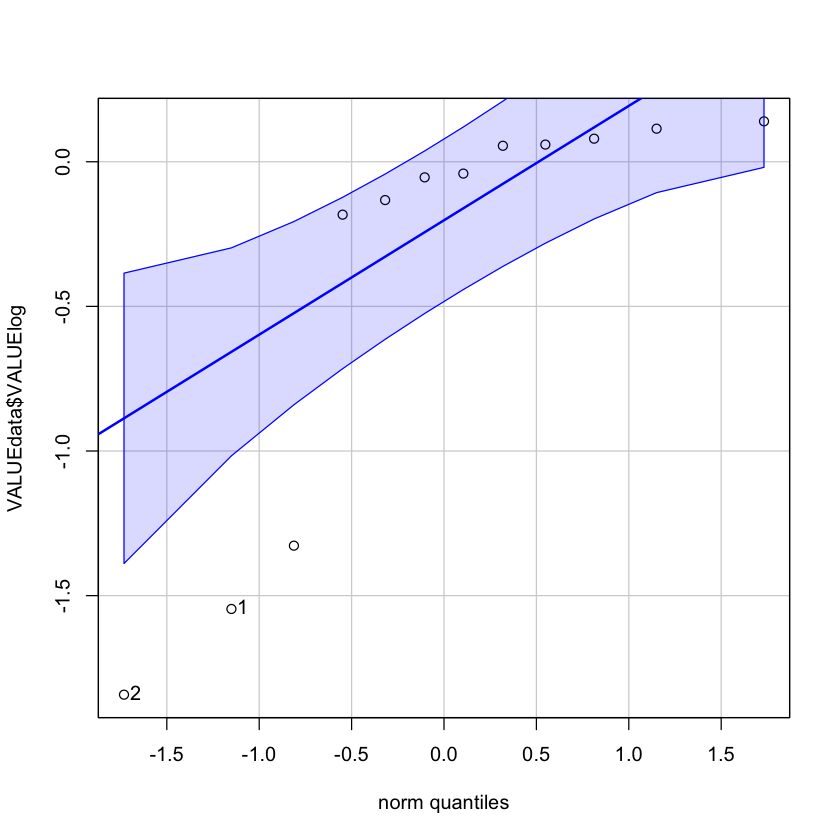

In [5]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


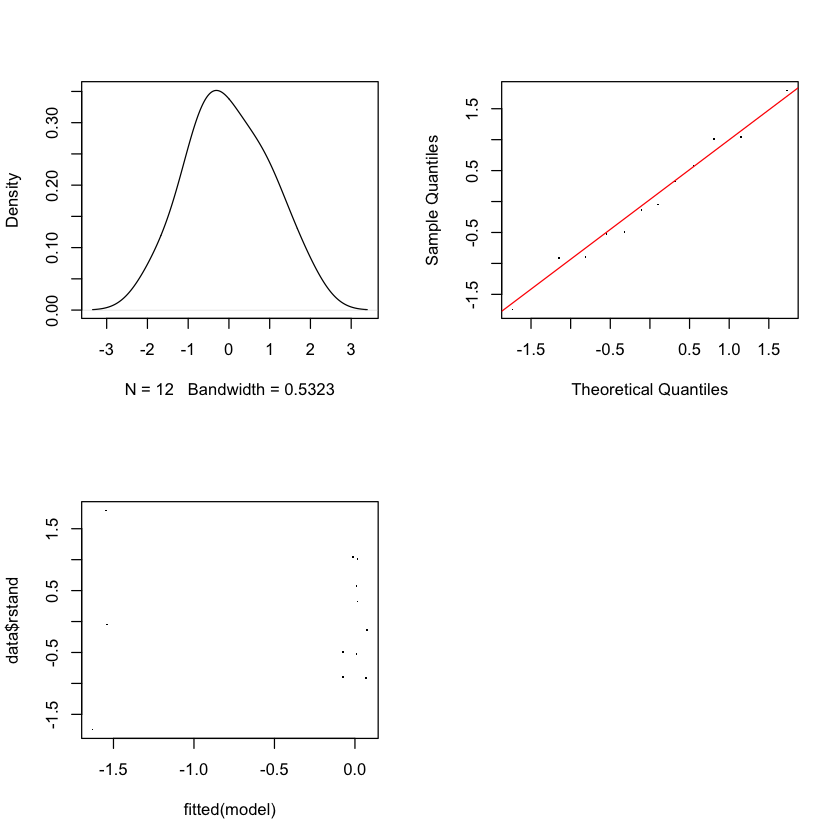

In [6]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [7]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
    -2.0      0.9      7.0    -14.0        6 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.71314 -0.60678 -0.09061  0.67070  1.76071 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.00349  0.05907 
 Residual             0.01546  0.12434 
Number of obs: 12, groups:  Trial, 3

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              -1.57190    0.07948 10.89207  -19.78 6.98e-10 ***
TreatmentX02.pep2         1.55637    0.10153  9.00000   15.33 9.34e-08 ***
TreatmentX03.Maya1_100uM  1.55599    0.10153  9.00000   15.33 9.36e-08 ***
TreatmentX04.Maya2_100uM  1.61623    0.10153  9.00000   15.92 6.72e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 

In [8]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF      F value     
 Min.   :5.597   Min.   :1.866   Min.   :3   Min.   :9   Min.   :120.7  
 1st Qu.:5.597   1st Qu.:1.866   1st Qu.:3   1st Qu.:9   1st Qu.:120.7  
 Median :5.597   Median :1.866   Median :3   Median :9   Median :120.7  
 Mean   :5.597   Mean   :1.866   Mean   :3   Mean   :9   Mean   :120.7  
 3rd Qu.:5.597   3rd Qu.:1.866   3rd Qu.:3   3rd Qu.:9   3rd Qu.:120.7  
 Max.   :5.597   Max.   :1.866   Max.   :3   Max.   :9   Max.   :120.7  
     Pr(>F)         
 Min.   :1.381e-07  
 1st Qu.:1.381e-07  
 Median :1.381e-07  
 Mean   :1.381e-07  
 3rd Qu.:1.381e-07  
 Max.   :1.381e-07  
       X01.DMSO        X02.pep2 X03.Maya1_100uM X04.Maya2_100uM 
            "a"             "b"             "b"             "b" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUElog ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypothese